✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
✅ Accuracy: 0.8547055210537091

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     11147
           1       0.81      0.51      0.63      3506

    accuracy                           0.85     14653
   macro avg       0.84      0.74      0.77     14653
weighted avg       0.85      0.85      0.84     14653

✅ Confusion Matrix:
 [[10733   414]
 [ 1715  1791]]


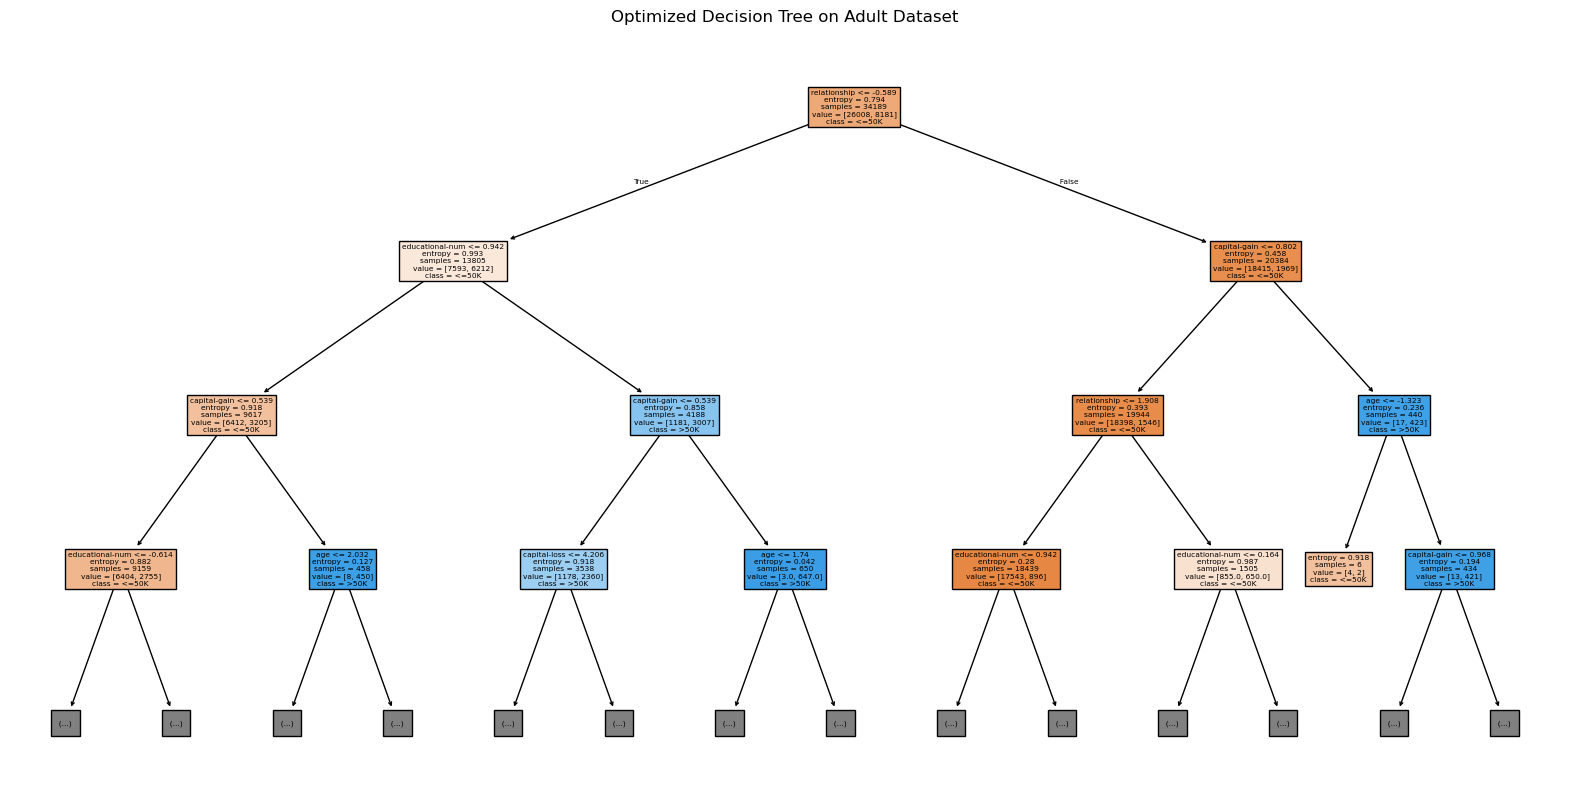

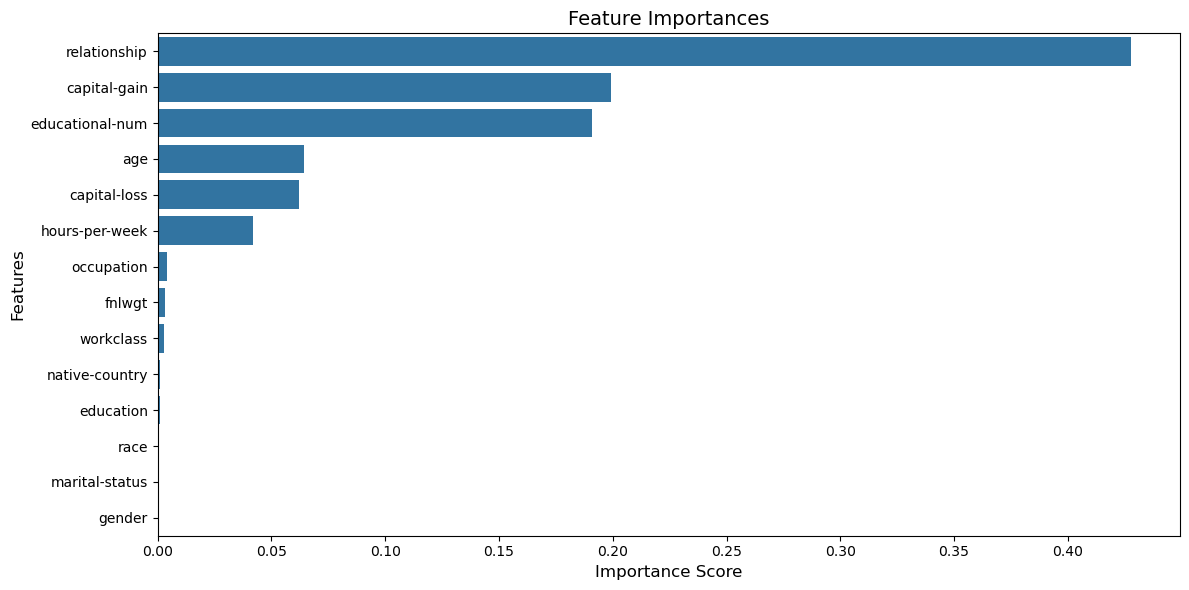

In [33]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load dataset
df = pd.read_csv("C:/Users/Saurabh/Downloads/archive (7)/adult.csv")

# Step 3: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 4: Fill missing values (no chained assignment)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Step 5: Label encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 6: Define features and target
X = df.drop('income', axis=1)
y = df['income']

# Step 7: Scale numeric features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Step 8: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# # Step 9: Grid Search to optimize Decision Tree
# param_grid = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [4, 6, 8, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(
#     DecisionTreeClassifier(random_state=42),
#     param_grid,
#     cv=5,
#     n_jobs=-1
# )
# grid.fit(X_train, y_train)
# clf = grid.best_estimator_

# Step 10: Predict and evaluate
y_pred = clf.predict(X_test)
print("✅ Best Parameters:", grid.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 11: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['income'].classes_, filled=True,max_depth=3)
plt.title("Optimized Decision Tree on Adult Dataset")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=importances.index)

# Add labels and title
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importances", fontsize=14)
plt.tight_layout()
plt.show()



   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
✅ Accuracy: 0.8166666666666667

✅ Classification Re

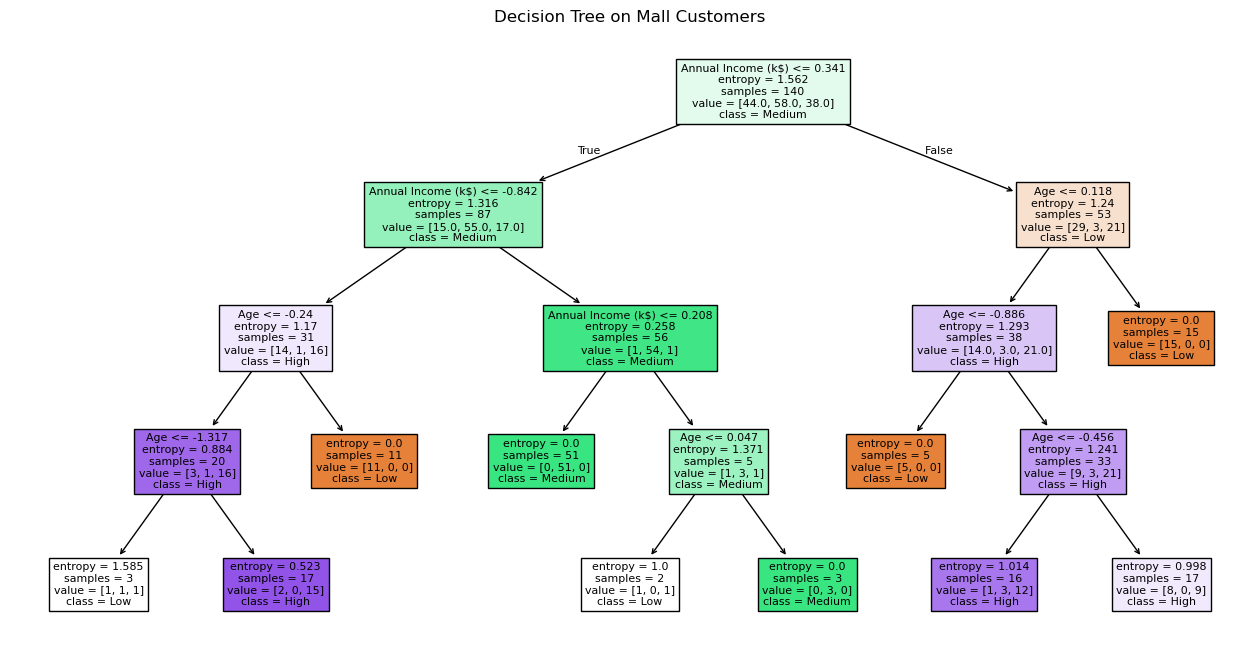

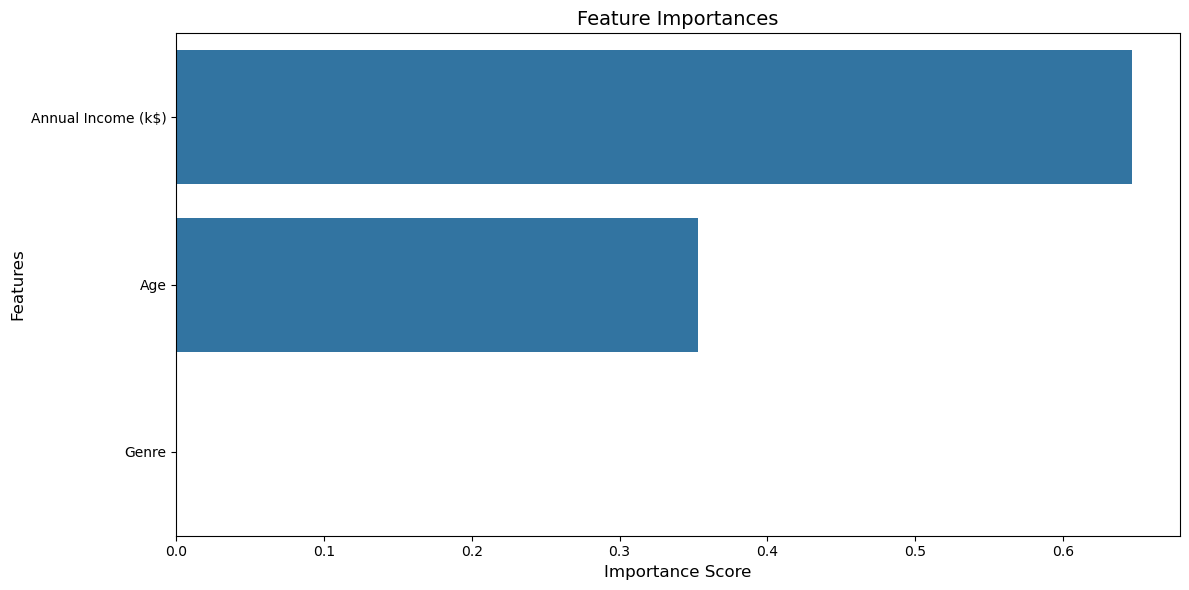

In [39]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset
df = pd.read_csv("C:/Users/Saurabh/Downloads/archive (8)/Mall_Customers.csv")
print(df.head())

# Step 3: Check for nulls and data types
print(df.info())

# Step 4: Drop non-useful columns (CustomerID doesn't help for prediction)
df.drop(['CustomerID'], axis=1, inplace=True)

# Step 5: Fill missing values if any (mode for categorical, mean for numeric)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Step 6: Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 7: Choose a target variable (e.g., cluster customers by Spending Score)
# You can change target based on your use-case; here we'll treat it as classification
# We'll create artificial labels by segmenting Spending Score
df['SpendingCategory'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 40, 70, 100], labels=[0, 1, 2])
df['SpendingCategory'] = df['SpendingCategory'].astype(int)

# Step 8: Define features and target
X = df.drop(['Spending Score (1-100)', 'SpendingCategory'], axis=1)
y = df['SpendingCategory']

# Step 9: Scale the features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Step 10: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 11: Train Decision Tree without Grid Search
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

# Step 12: Evaluation
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 13: Visualize Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True)
plt.title("Decision Tree on Mall Customers")
plt.show()

# Step 14: Feature Importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importances", fontsize=14)
plt.tight_layout()
plt.show()


✅ Accuracy: 0.8499283423189791

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     11147
           1       0.79      0.51      0.62      3506

    accuracy                           0.85     14653
   macro avg       0.82      0.73      0.76     14653
weighted avg       0.84      0.85      0.84     14653

✅ Confusion Matrix:
 [[10665   482]
 [ 1717  1789]]


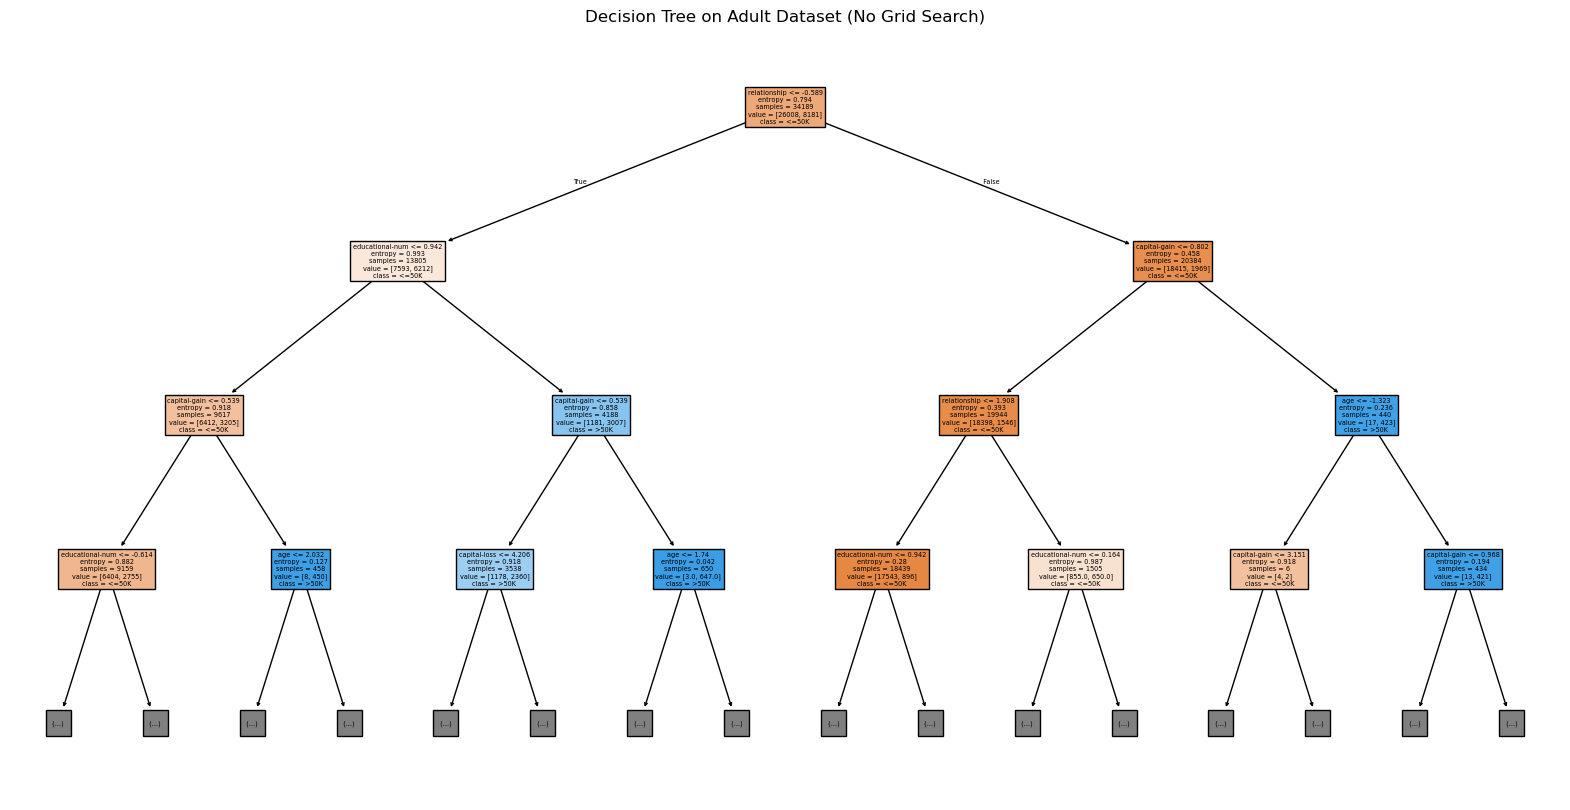

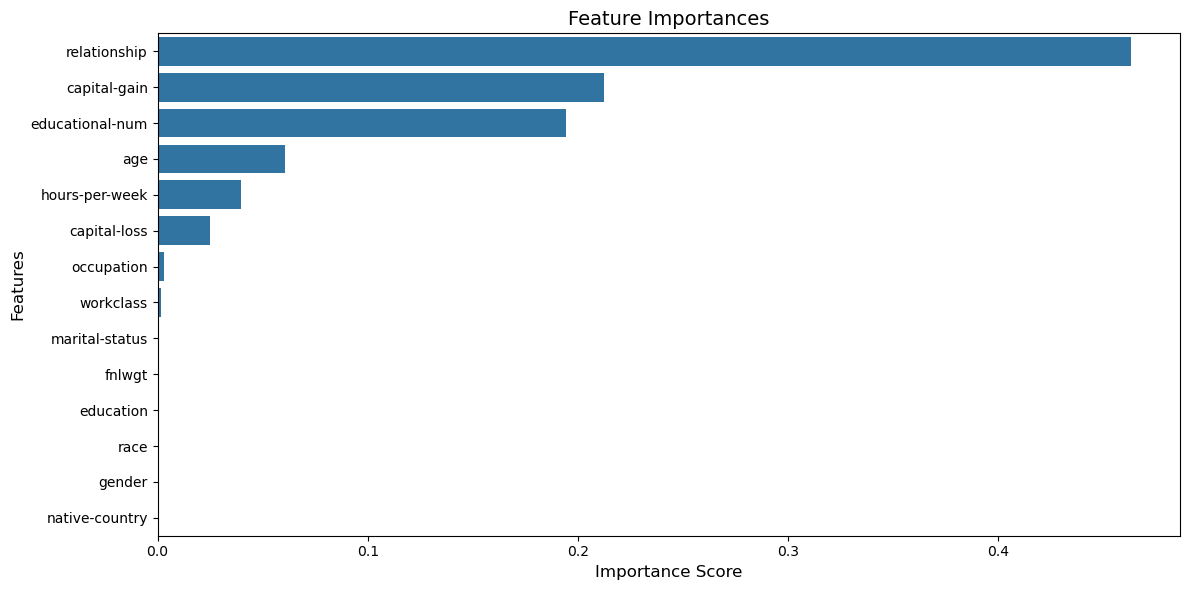